In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
sns.set()
from sklearn.cluster import KMeans
import pickle

In [2]:
data = pd.read_csv('final_data_for_clustering.csv')

In [3]:
data

,Quantity,Last purchase (days),Transactions Amount,Number of Transactions
0,2458,40,4310.00,182
1,2341,76,1797.24,31
2,631,19,1757.55,73
3,197,311,334.40,17
4,470,73,1545.41,95
...,...,...,...,...
4354,45,160,180.60,10
4355,54,4,80.82,7
4356,98,93,176.60,13
4357,1397,10,2094.88,756


In [4]:
scale = StandardScaler()
x = scale.fit_transform(data)

# Modeling
## Selecting optimal clusters
First we find optimal number of clusters by minimizing WCSS.

In [5]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [6]:
wcss

[17436.0,
 11027.685156578507,
 7930.773950903445,
 6356.46745707115,
 4991.437916389819,
 3995.9041297308127,
 3320.3926513924994,
 2694.938500660135,
 2363.7766523598943,
 1997.3788355890997,
 1742.227587524065,
 1594.8439020721669,
 1397.838058501952,
 1279.458644969967,
 1180.4209921344943,
 1057.7352501659113,
 998.9930030202668,
 903.8806090807165,
 852.6738497733677,
 797.2171871785772]

### The Elbow method

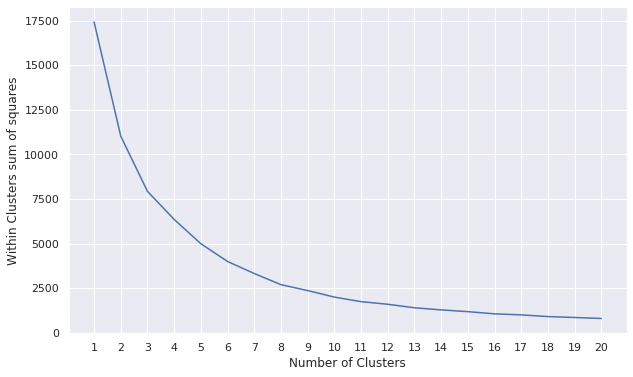

In [7]:
number_clusters = range(1, 21)
plt.figure(figsize=[10,6])
plt.plot(number_clusters, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters sum of squares')
plt.xticks(np.arange(min(number_clusters), max(number_clusters)+1, 1.0))
plt.show()

## Model

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
clusters = data.copy()
clusters['Cluster'] = kmeans.fit_predict(x)

# Final Analysis
I'll make inferences by comparing 2 features and also single feature.
## Ploting

### Quantity Vs Transactions Amount

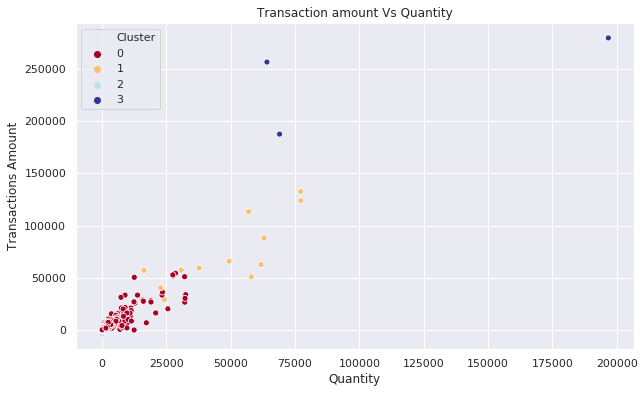

In [10]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=clusters, x='Quantity', y='Transactions Amount', hue='Cluster', palette='RdYlBu')
plt.legend(loc='best')
plt.title("Transaction amount Vs Quantity")
plt.show()

**Infrence:**
* **ID 2:** The people's which made least amount of transaction and also bought least amount of products. It's mean that these peoples are one time buyer's or rarely.
* **ID 3:** We can call them royal customers because they made highest transaction and bought highest amount of product. It's mean that they are satisfied with products.
* **ID 0:** These people are the oftenly visitors or we can say they are not satisfied and not too much dishearted with products. 
* **ID 1:** These people just lie behind the royal customers. They are somehow satisfied with products.

### Last purcahse (days) Vs Transactions Amount

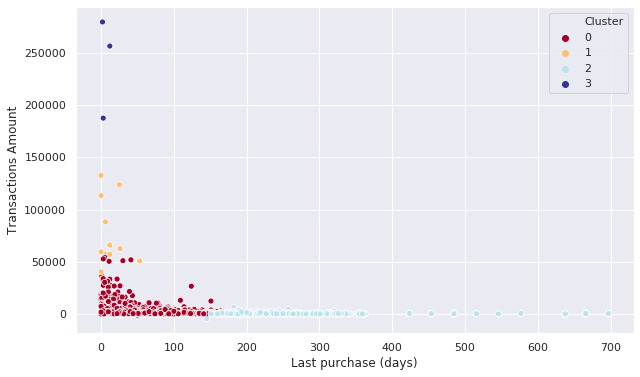

In [11]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=clusters, x='Last purchase (days)', y='Transactions Amount', hue='Cluster', palette='RdYlBu')
plt.show()

**Infrence:**
* **ID 2:** These customers are one time buyers and they made their purchase long ago.
* **ID 3:** These are royal customers. They have very high transaction amount.
* **ID 0:** These customers are oftenly visitors. Some of them made recently purchases and some of them made few days and months ago.
* **ID 1:** These people are satisfied customer they are not too much satisfied with products and store but also doesn't lie haters category and continue making purchases.

### Quantity Vs Total Transaction 

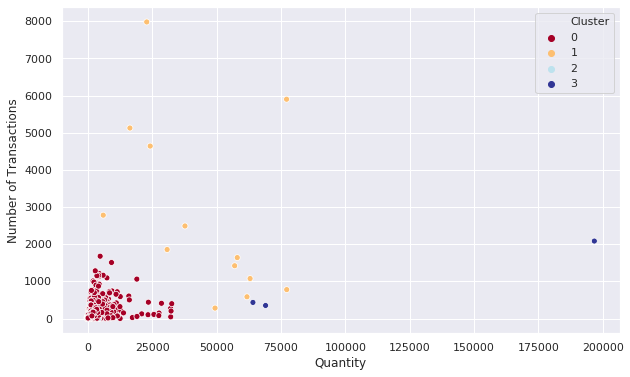

In [12]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=clusters, x='Quantity', y='Number of Transactions', hue='Cluster', palette='RdYlBu')
plt.show()

**Infrence:**
* **ID 2:** One time buyers also bought very low quantity of products. Some of them purchased more than one time.
* **ID 3:** Royel customers One of them bought highest quantity of products. One thing we can notice that they have less number of purchases it's mean that whenever they buy they buy with large quantity.
* **ID 0:** oftenly visitors. We are seeing balance in number of transaction and bought products quantity.
* **ID 1:** Satisfied Customers. Some customers made high number of transaction but bought less quantity of produccts. Some of them bought more quantity of product with less number of transactions.

### Transactions Amount Vs Total Transaction

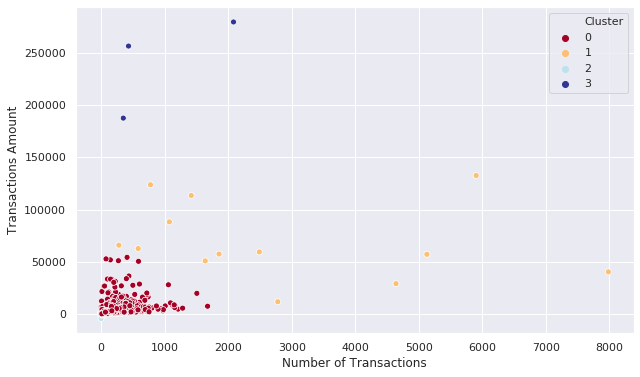

In [13]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=clusters, x='Number of Transactions', y='Transactions Amount', hue='Cluster', palette='RdYlBu')
plt.show()

**Infrence:**
* **ID 2:** One time buyers very less number of transactions and transaction amount.
* **ID 3:** Royel customers low number of transactions but high transaction amount.
* **ID 0:** oftenly visitors. Both have equal ratio.
* **ID 1:** Satisfied Customers. More number of trasactions and less transaction amount.

## Checking Number of Customers in Each Category

In [14]:
customers = pd.DataFrame(clusters['Cluster'].value_counts()).reset_index()
customers.rename(columns={'index': 'Customers Type', 'Cluster': 'Number of Customers'}, inplace=True)

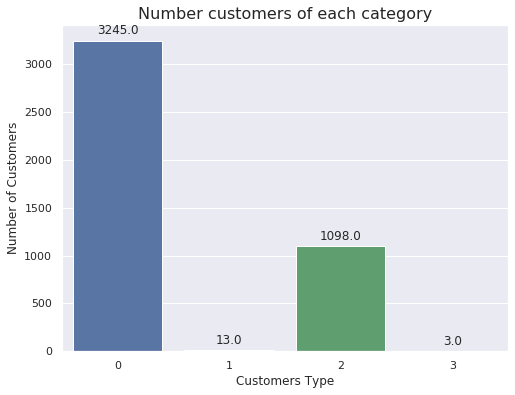

In [20]:
plt.figure(figsize=[8,6])
fig = sns.barplot(data=customers, x= 'Customers Type', y='Number of Customers')

for p in fig.patches:
    fig.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                 va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Number customers of each category', fontsize=16)
plt.show()

### Saving pickles

In [23]:
#scale object

pickle.dump(scale, open('variable_scalers.pkl', 'wb'))

#model

pickle.dump(kmeans, open('cluster_model.pkl', 'wb'))